/content/drive/MyDrive/A_doc_imp/A_Udeyme/A_Python_and_Pytorch_for_generative_AI/Pytorch/data/digits/train.csv

# Logistic Regression for Digit Classification using PyTorch


This Python script implements **Logistic Regression** using  **PyTorch ** to classify hand-written digits (0-9) from a dataset like **MNIST**. The model consists of a single linear layer without activation, as softmax is handled internally by the CrossEntropyLoss function. The dataset is loaded from a CSV file, preprocessed (normalized and split into training/testing sets), and then used for model training and evaluation.



**Key Features**:

**Data Preprocessing**: Loads dataset, normalizes pixel values, and converts them into PyTorch tensors.

**Model Definition**: Implements a Logistic Regression model with a single fully connected layer.

**Training**: Uses Stochastic Gradient Descent (SGD) to minimize CrossEntropyLoss.

**Evaluation**: Computes accuracy on test data and visualizes model predictions.

**GPU Support**: Automatically utilizes CUDA if available.

* Now lets look at computation graph of logistic regression
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
    * Parameters are weight and bias.
    * Weights: coefficients of each pixels
    * Bias: intercept
    * z = (w.t)x + b  => z equals to (transpose of weights times input x) + bias
    * In an other saying => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.
* Why we use sigmoid function?
    * It gives probabilistic result
    * It is derivative so we can use it in gradient descent algorithm (we will see as soon.)
* Lets make example:
    * Lets say we find z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification result is 1 with 90% probability.
* Now lets start with from beginning and examine each component of computation graph more detailed.

* Now lets look at computation graph of logistic regression
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
    * Parameters are weight and bias.
    * Weights: coefficients of each pixels
    * Bias: intercept
    * z = (w.t)x + b  => z equals to (transpose of weights times input x) + bias
    * In an other saying => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.
* Why we use sigmoid function?
    * It gives probabilistic result
    * It is derivative so we can use it in gradient descent algorithm (we will see as soon.)
* Lets make example:
    * Lets say we find z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification result is 1 with 90% probability.
* Now lets start with from beginning and examine each component of computation graph more detailed.


**Normalization:**

You are normalizing the features by dividing by 255, which is standard practice for image data to scale the pixel values to a [0, 1] range. Just ensure that the dataset you are using has pixel values in the 0-255 range (like the MNIST dataset).

**Training and Test Split:**

The train_test_split uses 80% for training and 20% for testing, which is common. However, the random_state=42 ensures that the split is reproducible.

**PyTorch Tensors:**

You are correctly converting the features and targets to PyTorch tensors and specifying the target data type as LongTensor, which is appropriate for classification problems.

**DataLoader:**

You've correctly created PyTorch DataLoader objects (train_loader and test_loader) for batching during training and testing, though the shuffle=False option might not be ideal for training. Typically, shuffle=True is used for training to prevent the model from learning any order bias.

**Visualization:**

The code to visualize one of the images is correct. You are reshaping the image to 28x28 pixels (for MNIST) and displaying the image with its corresponding label.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [ ]:
train=pd.read_csv(r"/content/drive/MyDrive/A_doc_imp/A_Udeyme/A_Python_and_Pytorch_for_generative_AI/Pytorch/data/digits/train.csv",dtype=np.float32)


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.shape

(42000, 785)

In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.020190,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312477,4.632941,3.274071,1.759778,1.894477,0.414262,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Load and Prepare the Dataset**

In [ ]:
target_numpy=train.label.values
features_numpy=train.loc[:,train.columns!='label'].values/255.0


#train test split

x_train,x_test,y_train,y_test=train_test_split(features_numpy,target_numpy,test_size=0.2,random_state=42)



In [ ]:
#convert to pytorch tensors

xTrain=torch.tensor(x_train,dtype=torch.float32)
yTrain=torch.tensor(y_train,dtype=torch.long)
xTest=torch.tensor(x_test,dtype=torch.float32)
yTest=torch.tensor(y_test,dtype=torch.long)

In [ ]:
# Create Pytorch dataset

train_dataset=TensorDataset(xTrain,yTrain)
test_dataset=TensorDataset(xTest,yTest)

In [ ]:
# create Dataloader
batch_size=100
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)


**PyTorch Dataset**

The Dataset class is a wrapper around PyTorch tensors (or other data formats) that allows:

Structured access to data: Each sample (input + label) can be indexed using Dataset[index].

Custom transformations: You can apply preprocessing transformations (e.g., normalization, augmentations).

Better organization: Easier to manage large datasets.



**PyTorch DataLoader**

The DataLoader class is used to:

Batch the data: Instead of processing one sample at a time, it loads multiple samples in one batch (batch_size).

Shuffle the data: Shuffling during training prevents the model from learning order dependencies.

Parallel data loading: Uses multiple CPU threads (num_workers) to speed up data loading.



**Define the Logistic Regression Model**

In [ ]:
class LogisticRegressionModle(nn.Module):
  def __init__(self,input_size,num_classes):
    super(LogisticRegressionModle,self).__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,x):
    return self.linear(x)


#Define the model
input_size=28*28 #784 pixel per image
num_classes=10
model=LogisticRegressionModle(input_size,num_classes)


# move model to GPU if available
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)


cuda


**Define Loss Function and Optimizer**

In [ ]:
criterion=nn.CrossEntropyLoss()

#Optimize SGS

learning_rate=0.01
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

**Train the Model**

In [ ]:
num_epochs=10
for epoch in range(num_epochs):
    model.train() # set the model to training mode
    total_loss=0
    for batch_idx,(features,labels) in enumerate(train_loader):
      features,labels=features.to(device),labels.to(device)

      # forward pass
      outputs=model(features)
      loss=criterion(outputs,labels)

      #backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss+=loss.item()

    avg_loss=total_loss/len(train_loader)
    print(f"Epoch[{epoch+1}/{num_epochs}],Loss:{avg_loss:.4f}")



Epoch[1/10],Loss:1.3789
Epoch[2/10],Loss:0.8037
Epoch[3/10],Loss:0.6492
Epoch[4/10],Loss:0.5739
Epoch[5/10],Loss:0.5280
Epoch[6/10],Loss:0.4964
Epoch[7/10],Loss:0.4730
Epoch[8/10],Loss:0.4548
Epoch[9/10],Loss:0.4402
Epoch[10/10],Loss:0.4280


**Evaluate the Model**

In [ ]:
model.eval() # set model to evaluation mode

correct=0
total=0
with torch.no_grad():
  for features,labels  in test_loader:
    features,labels=features.to(device),labels.to(device)
    outputs=model(features)
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
accuracy=100*correct/total
print(f"Test accuracy:{accuracy:.4f} %")


Test accuracy:88.4048 %


**Visualizing Some Predictions**

tensor([[-0.4371,  0.1454, -0.1367,  4.4882, -1.8136,  1.5031, -2.3163, -1.3576,
          1.3102, -1.6702]], device='cuda:0')


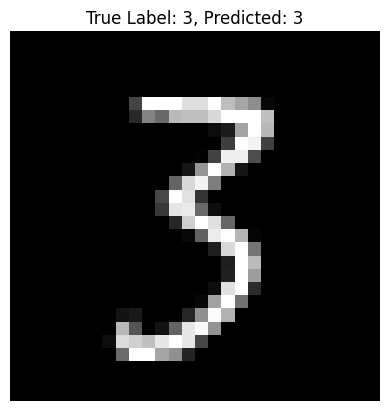

In [ ]:
import random

# Select a random sample from the test dataset
index = random.randint(0, len(xTest) - 1)
image = xTest[index].reshape(28, 28)
label = yTest[index].item()

# Get model prediction
model.eval()
with torch.no_grad():
    image_tensor = xTest[index].to(device).unsqueeze(0)
    output = model(image_tensor)
    print(output)
    _, predicted_label = torch.max(output, 1)

# Plot image
plt.imshow(image, cmap="gray")
plt.title(f"True Label: {label}, Predicted: {predicted_label.item()}")
plt.axis("off")
plt.show()
